<a href="https://colab.research.google.com/github/zyf2021/-/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias


In [3]:
train_split = int(0.8 * len(y))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_test)

10

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

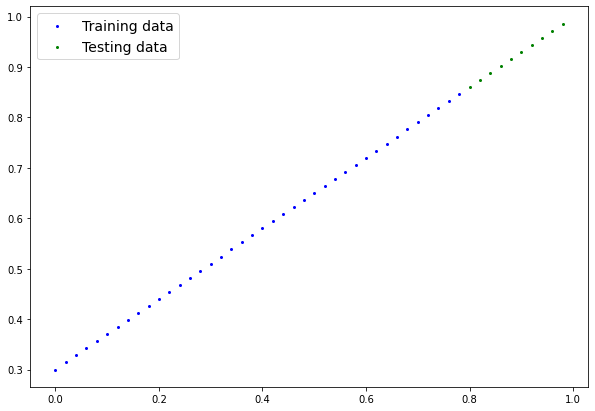

In [5]:
plot_predictions()

In [6]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [7]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(36)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.4704], requires_grad=True), Parameter containing:
 tensor([-0.0512], requires_grad=True)]

In [8]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.4704])), ('bias', tensor([-0.0512]))])

In [9]:
with torch.inference_mode(): 
  y_preds = model_0(X_test)

In [10]:
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3251],
        [0.3345],
        [0.3439],
        [0.3533],
        [0.3627],
        [0.3721],
        [0.3815],
        [0.3909],
        [0.4003],
        [0.4097]])


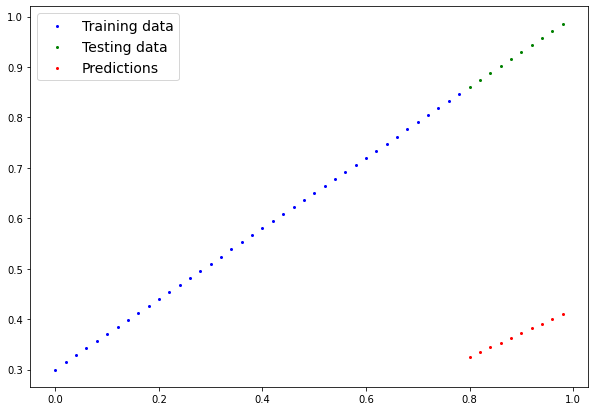

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
y_test - y_preds

tensor([[0.5349],
        [0.5395],
        [0.5441],
        [0.5487],
        [0.5533],
        [0.5579],
        [0.5625],
        [0.5671],
        [0.5717],
        [0.5763]])

In [13]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.01)

In [14]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 220

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.44079118967056274 | MAE Test Loss: 0.5421218872070312 
Epoch: 10 | MAE Train Loss: 0.32558122277259827 | MAE Test Loss: 0.40741196274757385 
Epoch: 20 | MAE Train Loss: 0.21037128567695618 | MAE Test Loss: 0.27270203828811646 
Epoch: 30 | MAE Train Loss: 0.09516123682260513 | MAE Test Loss: 0.13799205422401428 
Epoch: 40 | MAE Train Loss: 0.015368292108178139 | MAE Test Loss: 0.037895649671554565 
Epoch: 50 | MAE Train Loss: 0.011517633683979511 | MAE Test Loss: 0.02622426673769951 
Epoch: 60 | MAE Train Loss: 0.008079780265688896 | MAE Test Loss: 0.0179517213255167 
Epoch: 70 | MAE Train Loss: 0.00464413920417428 | MAE Test Loss: 0.010366052389144897 
Epoch: 80 | MAE Train Loss: 0.0016544871032238007 | MAE Test Loss: 0.0034387886989861727 
Epoch: 90 | MAE Train Loss: 0.006500396877527237 | MAE Test Loss: 0.0034387886989861727 
Epoch: 100 | MAE Train Loss: 0.006500396877527237 | MAE Test Loss: 0.0034387886989861727 
Epoch: 110 | MAE Train Loss: 0.0065003968

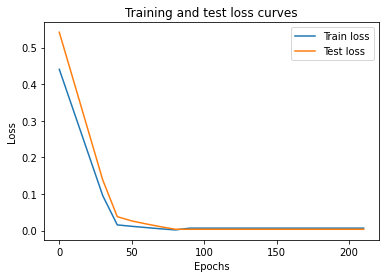

In [15]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [16]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6929])), ('bias', tensor([0.2963]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


###4. Making predictions with a trained PyTorch model (inference)

In [17]:
# 1. Установить режим прогноза
model_0.eval()

with torch.inference_mode():
  # 3. перенос данных на устройство
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8506],
        [0.8645],
        [0.8783],
        [0.8922],
        [0.9060],
        [0.9199],
        [0.9338],
        [0.9476],
        [0.9615],
        [0.9753]])

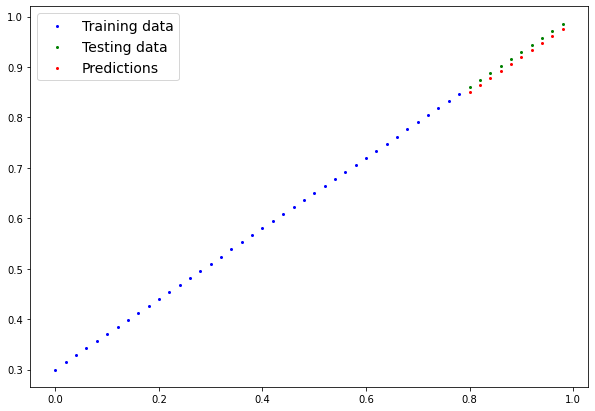

In [19]:
plot_predictions(predictions = y_preds)

In [20]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok =True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # сохранение словаря моделей
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


In [21]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

In [22]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_m_preds = loaded_model_0(X_test)


In [23]:
y_preds == loaded_m_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. Putting it all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Используемое устройство {device}")

Используемое устройство cuda


In [3]:
weight1 = 0.7
weight2 = 0.5
bias = 0.3

start = 0
end = 1
step = 0.03

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight1 * X**2 + weight2*X + bias
X[10:20], y[10:20]

(tensor([[0.3000],
         [0.3300],
         [0.3600],
         [0.3900],
         [0.4200],
         [0.4500],
         [0.4800],
         [0.5100],
         [0.5400],
         [0.5700]]), tensor([[0.5130],
         [0.5412],
         [0.5707],
         [0.6015],
         [0.6335],
         [0.6668],
         [0.7013],
         [0.7371],
         [0.7741],
         [0.8124]]))

In [4]:
train_split  = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

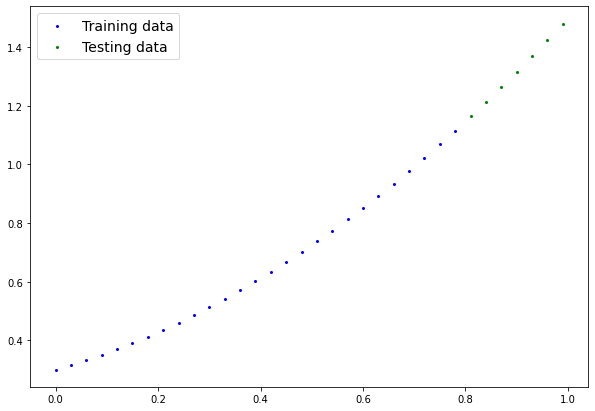

In [6]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear
